<a href="https://colab.research.google.com/github/iamBehzad/Five-Project-Advanced-Deep-Learning-Low-Level-Modeling/blob/main/Project01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf 
from tensorflow import keras
from tensorflow.keras import layers
from keras import metrics

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('CarPrice_Assignment.csv')
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [ ]:
print ('\n=================================== ((((( missing values in DataFrame ))))) ===================================\n')
print(df.isnull().sum())

print ('\n=================================== ((((( There is no Missing Values ))))) ===================================\n')

X=df.drop(['price'], axis=1)
Y=df['price']


le = LabelEncoder()
X['CarName'] = le.fit_transform(X['CarName'])
X['fueltype'] = le.fit_transform(X['fueltype'])
X['aspiration'] = le.fit_transform(X['aspiration'])
X['doornumber'] = le.fit_transform(X['doornumber'])
X['carbody'] = le.fit_transform(X['carbody'])
X['drivewheel'] = le.fit_transform(X['drivewheel'])
X['enginelocation'] = le.fit_transform(X['enginelocation'])
X['enginetype'] = le.fit_transform(X['enginetype'])
X['cylindernumber'] = le.fit_transform(X['cylindernumber'])
X['fuelsystem'] = le.fit_transform(X['fuelsystem'])
X['CarName'] = le.fit_transform(X['CarName'])
X['fueltype'] = le.fit_transform(X['fueltype'])


print ('\n======================================= ((((( Type Of X DataFrame ))))) =======================================\n')
print(X.dtypes)

print ('\n======================================= ((((( Type Of Y DataFrame ))))) =======================================\n')
print(Y.dtypes)

print ('\n=================================== ((((( There is no object values ))))) ===================================\n')


=================================== ((((( missing values in DataFrame ))))) ===================================

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

=================================== ((((( There is no Missing Values ))))) ===================================


======================================= ((((( Type Of X DataFrame ))))) =======================================

car_ID                int64
symboling             int64
CarName           

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X,Y)

print("X_train.shape = ",x_train.shape)
print("y_train.shape = ",y_train.shape)
print("\nX_test.shape = ",x_test.shape)
print("y_test.shape = ",y_test.shape)

X_train.shape =  (153, 25)
y_train.shape =  (153,)

X_test.shape =  (52, 25)
y_test.shape =  (52,)


In [ ]:
SC=StandardScaler()
x_train = SC.fit_transform(x_train)
x_test = SC.fit_transform(x_test)

In [ ]:
model_My_loss = keras.models.Sequential([
  keras.layers.Dense(50, activation ="relu"),
  keras.layers.Dense(50, activation='relu'),
  keras.layers.Dense(50, activation='relu'),
  keras.layers.Dense(1)
])

model_MAE = keras.models.Sequential([
  keras.layers.Dense(50, activation ="relu"),
  keras.layers.Dense(50, activation='relu'),
  keras.layers.Dense(50, activation='relu'),
  keras.layers.Dense(1)
])

model_MSE = keras.models.Sequential([
  keras.layers.Dense(50, activation ="relu"),
  keras.layers.Dense(50, activation='relu'),
  keras.layers.Dense(50, activation='relu'),
  keras.layers.Dense(1)
])

In [ ]:
class My_loss(keras.losses.Loss):
  def __init__(self, e1, e2, l1, l2, l3, **kwargs):
    self.e1 = e1
    self.e2 = e2

    self.l1 = l1
    self.l2 = l2
    self.l3 = l3

    super().__init__(**kwargs)

  def call(self, y_true, y_pred):
    d = tf.abs(y_true - y_pred)
    #print("\n",tf.reduce_max(d))
    #print(tf.reduce_min(d))
    return tf.experimental.numpy.select(
        [d >= self.e1, tf.logical_and(d > self.e2, d < self.e1), d <= self.e2],
        [self.l3*d, self.l2*d, self.l1*d])


  def get_config(self):
    parent_config = super().get_config()
    return {**parent_config, "e1":self.e1, "e2":self.e2, "l1":self.l1, "l2":self.l2, "l3":self.l3}

In [ ]:
my_loss = My_loss(e1=10000, e2=5000, l1=1, l2=2, l3=4)
del model_My_loss
model_My_loss = keras.models.Sequential([
  keras.layers.Dense(50, activation ="relu"),
  keras.layers.Dense(50, activation='relu'),
  keras.layers.Dense(50, activation='relu'),
  keras.layers.Dense(1)
])

model_My_loss.compile(loss=my_loss, optimizer="adam", metrics=["mean_absolute_error"])
history_model_Myloss=model_My_loss.fit(x_train,y_train, epochs=50, validation_split=0.15)
print(history_model_Myloss.history)

Epoch 1/50
5/5 [==============================] - 2s 108ms/step - loss: 43512.5039 - mean_absolute_error: 12808.0186 - val_loss: 53089.7383 - val_mean_absolute_error: 14894.0410
Epoch 2/50
5/5 [==============================] - 0s 22ms/step - loss: 43510.8477 - mean_absolute_error: 12807.4932 - val_loss: 53087.6562 - val_mean_absolute_error: 14893.4277
Epoch 3/50
5/5 [==============================] - 0s 17ms/step - loss: 43508.9219 - mean_absolute_error: 12806.8877 - val_loss: 53085.1289 - val_mean_absolute_error: 14892.6797
Epoch 4/50
5/5 [==============================] - 0s 29ms/step - loss: 43506.6133 - mean_absolute_error: 12806.1484 - val_loss: 53081.9141 - val_mean_absolute_error: 14891.7227
Epoch 5/50
5/5 [==============================] - 0s 29ms/step - loss: 43503.5547 - mean_absolute_error: 12805.1768 - val_loss: 53077.7734 - val_mean_absolute_error: 14890.4854
Epoch 6/50
5/5 [==============================] - 0s 27ms/step - loss: 43499.6328 - mean_absolute_error: 12803.920

In [ ]:
model_MAE.compile(loss="mean_absolute_error", optimizer="adam", metrics=["mean_absolute_error"])
history_model_Mae=model_MAE.fit(x_train,y_train, epochs=50, validation_split=0.15)
print(history_model_Mae.history)

Epoch 1/50
5/5 [==============================] - 2s 100ms/step - loss: 12808.3389 - mean_absolute_error: 12808.3389 - val_loss: 14894.3750 - val_mean_absolute_error: 14894.3750
Epoch 2/50
5/5 [==============================] - 0s 20ms/step - loss: 12807.8662 - mean_absolute_error: 12807.8662 - val_loss: 14893.8369 - val_mean_absolute_error: 14893.8369
Epoch 3/50
5/5 [==============================] - 0s 19ms/step - loss: 12807.3574 - mean_absolute_error: 12807.3574 - val_loss: 14893.2012 - val_mean_absolute_error: 14893.2012
Epoch 4/50
5/5 [==============================] - 0s 33ms/step - loss: 12806.7246 - mean_absolute_error: 12806.7246 - val_loss: 14892.3779 - val_mean_absolute_error: 14892.3779
Epoch 5/50
5/5 [==============================] - 0s 28ms/step - loss: 12805.9189 - mean_absolute_error: 12805.9189 - val_loss: 14891.2910 - val_mean_absolute_error: 14891.2910
Epoch 6/50
5/5 [==============================] - 0s 34ms/step - loss: 12804.8438 - mean_absolute_error: 12804.843

In [ ]:
model_MSE.compile(loss="mean_squared_error", optimizer="adam", metrics=["mean_absolute_error"])
history_model_Mse=model_MSE.fit(x_train,y_train, epochs=50, validation_split=0.15)
print(history_model_Mse.history)

Epoch 1/50
5/5 [==============================] - 2s 50ms/step - loss: 220478560.0000 - mean_absolute_error: 12808.2578 - val_loss: 313328608.0000 - val_mean_absolute_error: 14894.2354
Epoch 2/50
5/5 [==============================] - 0s 16ms/step - loss: 220462240.0000 - mean_absolute_error: 12807.6924 - val_loss: 313304256.0000 - val_mean_absolute_error: 14893.5654
Epoch 3/50
5/5 [==============================] - 0s 15ms/step - loss: 220442800.0000 - mean_absolute_error: 12807.0508 - val_loss: 313276352.0000 - val_mean_absolute_error: 14892.7910
Epoch 4/50
5/5 [==============================] - 0s 16ms/step - loss: 220421168.0000 - mean_absolute_error: 12806.3115 - val_loss: 313240512.0000 - val_mean_absolute_error: 14891.8154
Epoch 5/50
5/5 [==============================] - 0s 16ms/step - loss: 220393424.0000 - mean_absolute_error: 12805.3682 - val_loss: 313194688.0000 - val_mean_absolute_error: 14890.5811
Epoch 6/50
5/5 [==============================] - 0s 15ms/step - loss: 2203

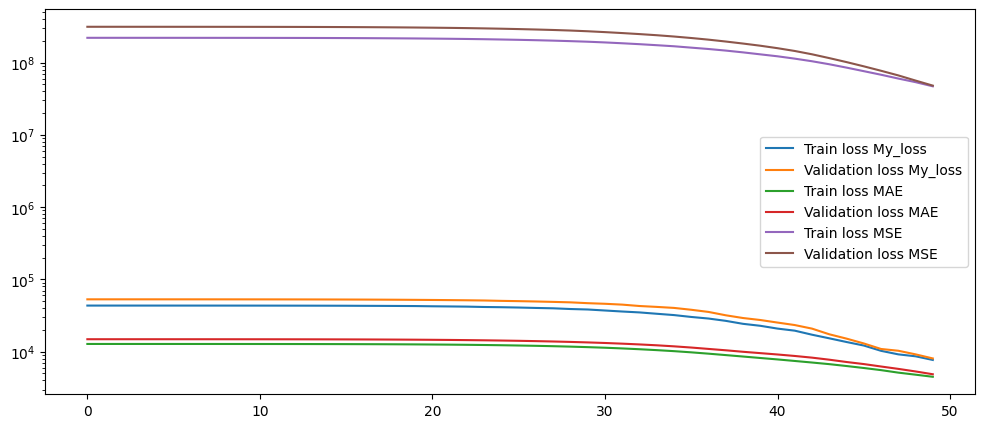

In [ ]:
fig, ax = plt.subplots(figsize=(12, 5))
ax.set_yscale('log')
ax.plot(history_model_Myloss.history['loss'], label='Train loss My_loss')
ax.plot(history_model_Myloss.history['val_loss'], label='Validation loss My_loss')

ax.plot(history_model_Mae.history['loss'], label='Train loss MAE')
ax.plot(history_model_Mae.history['val_loss'], label='Validation loss MAE')

ax.plot(history_model_Mse.history['loss'], label='Train loss MSE')
ax.plot(history_model_Mse.history['val_loss'], label='Validation loss MSE')

ax.legend();

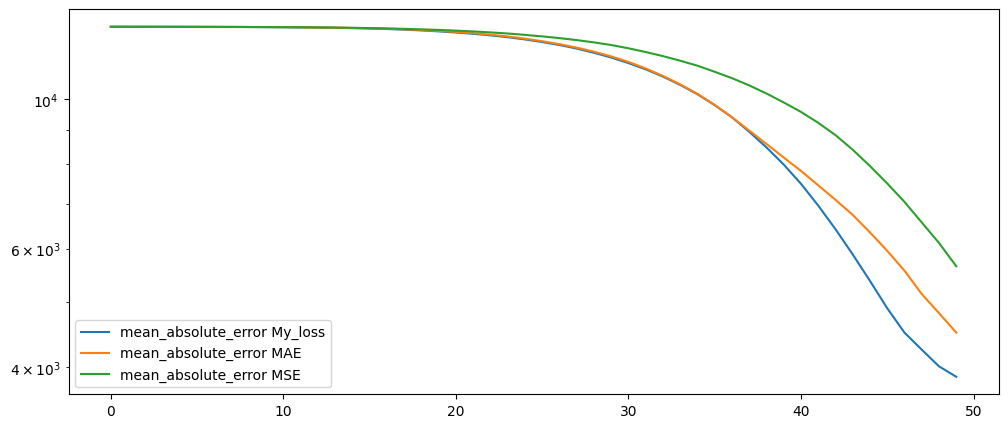

In [ ]:
fig, ax = plt.subplots(figsize=(12, 5))
ax.set_yscale('log')

ax.plot(history_model_Myloss.history['mean_absolute_error'], label='mean_absolute_error My_loss')

ax.plot(history_model_Mae.history['mean_absolute_error'], label='mean_absolute_error MAE')

ax.plot(history_model_Mse.history['mean_absolute_error'], label='mean_absolute_error MSE')

ax.legend();